In [83]:
import cv2
import warnings
import mediapipe as mp
import os
import absl.logging
import matplotlib.pyplot as plt
import pandas as pd

# Suppress TensorFlow, MediaPipe, and protobuf logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # 0 = all logs, 1 = info, 2 = warning, 3 = error only
absl.logging.set_verbosity(absl.logging.ERROR)
warnings.filterwarnings("ignore")

In [84]:

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())

    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

I0000 00:00:1762663146.995645   24209 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762663146.997435   31277 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.61, 6.14.0-35-generic)
W0000 00:00:1762663147.052906   31263 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762663147.065692   31265 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762663147.066397   31273 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762663147.066422   31262 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. D

<class 'mediapipe.python.solution_base.SolutionOutputs'>


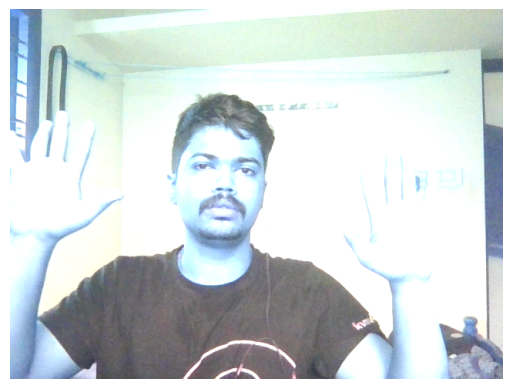

In [85]:
#image = cv2.imread(image)
image = cv2.convertScaleAbs(image, alpha=1.2, beta=25)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [86]:
results.face_landmarks

landmark {
  x: 0.434721231
  y: 0.525264323
  z: -0.0294770617
}
landmark {
  x: 0.439157039
  y: 0.483294308
  z: -0.0427176505
}
landmark {
  x: 0.436336458
  y: 0.499193311
  z: -0.0252871905
}
landmark {
  x: 0.432779491
  y: 0.45059675
  z: -0.0284679048
}
landmark {
  x: 0.440037936
  y: 0.471985817
  z: -0.0440499112
}
landmark {
  x: 0.440177709
  y: 0.459190071
  z: -0.0391496345
}
landmark {
  x: 0.439400762
  y: 0.430599898
  z: -0.0128377313
}
landmark {
  x: 0.378027707
  y: 0.42958
  z: 0.0114896512
}
landmark {
  x: 0.440075606
  y: 0.411003172
  z: -0.00429956848
}
landmark {
  x: 0.441206545
  y: 0.397123337
  z: -0.00361401588
}
landmark {
  x: 0.443509132
  y: 0.343837738
  z: 0.0140643502
}
landmark {
  x: 0.43429628
  y: 0.531061351
  z: -0.0289905071
}
landmark {
  x: 0.433543742
  y: 0.535883188
  z: -0.0267718304
}
landmark {
  x: 0.432778716
  y: 0.538266242
  z: -0.0236146543
}
landmark {
  x: 0.432363182
  y: 0.541340768
  z: -0.0240981057
}
landmark {
  x: 

In [87]:
results.left_hand_landmarks

landmark {
  x: 0.813977778
  y: 0.736483693
  z: 2.14959e-07
}
landmark {
  x: 0.763466537
  y: 0.710233092
  z: -0.0233128238
}
landmark {
  x: 0.72124815
  y: 0.666087806
  z: -0.0351406
}
landmark {
  x: 0.698420703
  y: 0.62284869
  z: -0.0455943532
}
landmark {
  x: 0.678881407
  y: 0.58859545
  z: -0.0552802943
}
landmark {
  x: 0.755721509
  y: 0.56248939
  z: -0.0130725242
}
landmark {
  x: 0.735700488
  y: 0.495080024
  z: -0.028027134
}
landmark {
  x: 0.726683676
  y: 0.454277217
  z: -0.0419775918
}
landmark {
  x: 0.720916
  y: 0.420264423
  z: -0.0520192459
}
landmark {
  x: 0.786738932
  y: 0.54884553
  z: -0.0131985312
}
landmark {
  x: 0.778756082
  y: 0.468982041
  z: -0.0242245849
}
landmark {
  x: 0.775432646
  y: 0.423299193
  z: -0.0345032401
}
landmark {
  x: 0.773686409
  y: 0.387204736
  z: -0.0425757058
}
landmark {
  x: 0.81589371
  y: 0.551019311
  z: -0.0173883066
}
landmark {
  x: 0.81234175
  y: 0.48015213
  z: -0.0278298706
}
landmark {
  x: 0.80877459


In [88]:
results.right_hand_landmarks

landmark {
  x: 0.040583659
  y: 0.614995122
  z: 2.22173185e-07
}
landmark {
  x: 0.101815671
  y: 0.595940113
  z: -0.0100882007
}
landmark {
  x: 0.151766479
  y: 0.552488863
  z: -0.0117925908
}
landmark {
  x: 0.187434942
  y: 0.515216112
  z: -0.0162361693
}
landmark {
  x: 0.216008127
  y: 0.501473367
  z: -0.0207633413
}
landmark {
  x: 0.118777879
  y: 0.448832184
  z: 0.0121961627
}
landmark {
  x: 0.142579973
  y: 0.386397809
  z: 0.00802003872
}
landmark {
  x: 0.154729486
  y: 0.350134313
  z: 0.00153040094
}
landmark {
  x: 0.163158715
  y: 0.319111824
  z: -0.00342637091
}
landmark {
  x: 0.0862165168
  y: 0.432281315
  z: 0.00862711854
}
landmark {
  x: 0.097755909
  y: 0.358716816
  z: 0.00871608872
}
landmark {
  x: 0.104193687
  y: 0.320240498
  z: 0.00528591918
}
landmark {
  x: 0.10919489
  y: 0.289311677
  z: 0.00160456169
}
landmark {
  x: 0.0554554239
  y: 0.429923505
  z: 0.00136347557
}
landmark {
  x: 0.0585421957
  y: 0.364557177
  z: 0.000650127244
}
landma

In [89]:
# Face landmarks plot

landmarks = pd.DataFrame(columns=['x', 'y', 'z'])

if results.face_landmarks is not None:
    for i, point in enumerate(results.face_landmarks.landmark):
        landmarks.loc[i] = [point.x, point.y, point.z]

    landmarks['y'] = -landmarks['y']


<Axes: xlabel='x', ylabel='y'>

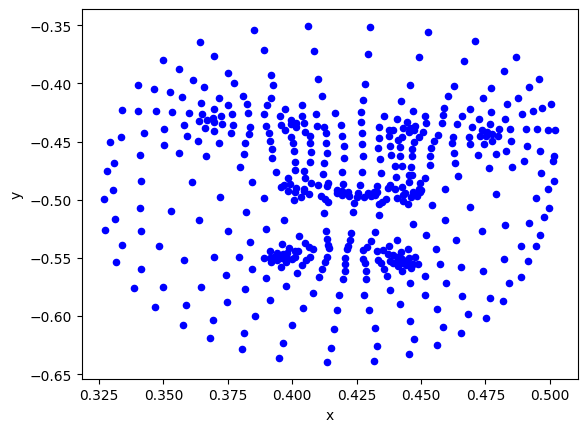

In [75]:
landmarks.plot(x='x',y='y',kind='scatter',color='blue')

In [90]:
# Left hand landmarks

left_hand_landmarks = pd.DataFrame(columns=['x', 'y', 'z'])

if results.left_hand_landmarks is not None:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand_landmarks.loc[i] = [point.x, point.y, point.z]

    left_hand_landmarks['y'] = -left_hand_landmarks['y']

<Axes: xlabel='x', ylabel='y'>

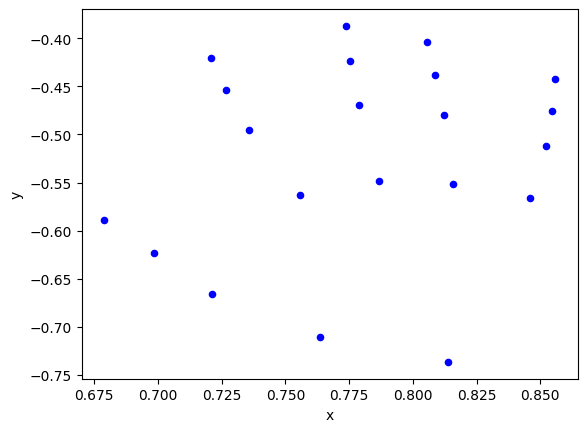

In [91]:
left_hand_landmarks.plot(x='x',y='y',kind='scatter',color='blue')

In [92]:
#right hand landmarks


right_hand_landmarks = pd.DataFrame(columns=['x', 'y', 'z'])

if results.right_hand_landmarks is not None:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand_landmarks.loc[i] = [point.x, point.y, point.z]

    right_hand_landmarks['y'] = -right_hand_landmarks['y']

<Axes: xlabel='x', ylabel='y'>

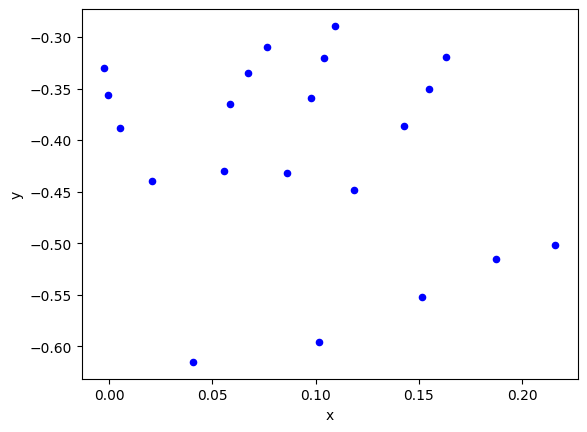

In [93]:
right_hand_landmarks.plot(x='x',y='y',kind='scatter',color='blue')

In [94]:
#pose landmarks

pose_landmarks = pd.DataFrame(columns=['x', 'y', 'z'])

if results.pose_landmarks is not None:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose_landmarks.loc[i] = [point.x, point.y, point.z]

    pose_landmarks['y'] = -pose_landmarks['y']

<Axes: xlabel='x', ylabel='y'>

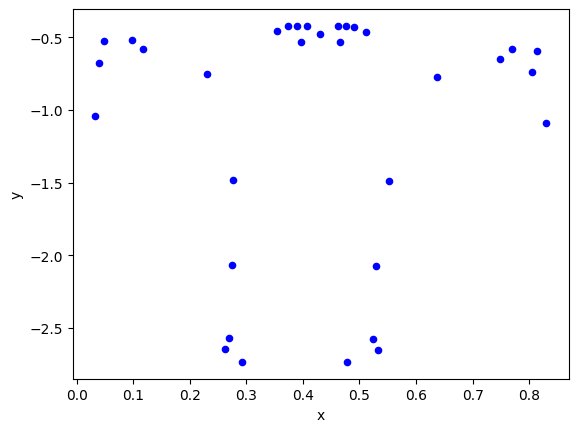

In [95]:
pose_landmarks.plot(x='x',y='y',kind='scatter',color='blue')